# 🚀 Artificial Intelligence - 2025 | Week 13 (LIME AND SHAP)
*Unlock the Future with Intelligent Machines* 🤖✨

- **Author:** Teerapong Panboonyuen (also known as Kao Panboonyuen)
- **GitHub:** [kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1](https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1)

# 0) Installation

In [ ]:
# Breast Cancer Explainable AI
# Author: Kao Panboonyuen

# -----------------------
# 0) Installation (run this cell in Colab)
# -----------------------

# 📦 Install explanation libraries (only needed in Colab / if not installed)
# Run this cell once at the top of your Colab runtime
try:
  import lime
  import shap
except Exception:
  !pip install -q lime shap

# 1) Imports & Settings

In [ ]:
from IPython.display import display, Markdown, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 42
sns.set(style='whitegrid')

# Helper to show markdown nicely (short text explanation for each cell)
def md(text):
    display(Markdown(text))

# 2) Download data from GitHub

In [ ]:
md("## 📥 1) Download dataset from GitHub (raw)\n*Loading the CSV into a pandas DataFrame.*")

RAW_URL = (
    'https://raw.githubusercontent.com/kaopanboonyuen/panboonyuen_dataset/main/public_dataset/cancer/#YOUR_DATASET'
)

## 📥 1) Download dataset from GitHub (raw)
*Loading the CSV into a pandas DataFrame.*

In [ ]:
# read CSV
try:
    df = pd.read_csv(RAW_URL)
except Exception as e:
    md(f"**Error downloading data:** {e}")
    raise

In [ ]:
md(f"**Dataset shape:** `{df.shape}` — first 5 rows below")
display(df.head())

**Dataset shape:** `(569, 33)` — first 5 rows below

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 3) Clean & quick checks

In [ ]:
md("## 🔎 2) Quick checks & cleaning\n*Check column names, missing values, and map target to numeric.*")

# If 'id' column exists, drop it (not useful as feature)
if 'id' in df.columns:
    df = df.drop(columns=['#INSERT_THE_COULUMN'])

## 🔎 2) Quick checks & cleaning
*Check column names, missing values, and map target to numeric.*

In [ ]:
# Some CSVs have trailing unnamed columns; drop fully-null columns
df = df.loc[:, ~df.columns.str.contains('#INSERT_YOUR_CODE')]

In [ ]:
# target column may be 'diagnosis' with values 'M' and 'B'
md('**Target value counts:**')
print(df['diagnosis'].value_counts())

**Target value counts:**

diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
# map target to numeric
df['target'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [ ]:
# drop original diagnosis if you like
# df = df.drop(columns=['diagnosis'])

In [ ]:
md('**Missing values per column (should be 0):**')
print(df.isna().sum().sort_values(ascending=False).head(10))

**Missing values per column (should be 0):**

diagnosis              0
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
symmetry_mean          0
dtype: int64


# 4) Exploratory Data Analysis (EDA) with seaborn

## 📊 3) EDA (seaborn) — quick but informative view

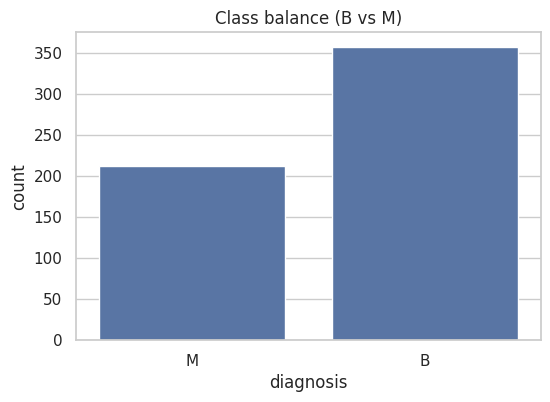

In [ ]:
md('## 📊 3) EDA (seaborn) — quick but informative view')

# 3.1 Class balance
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df)
plt.title('Class balance (B vs M)')
plt.show()

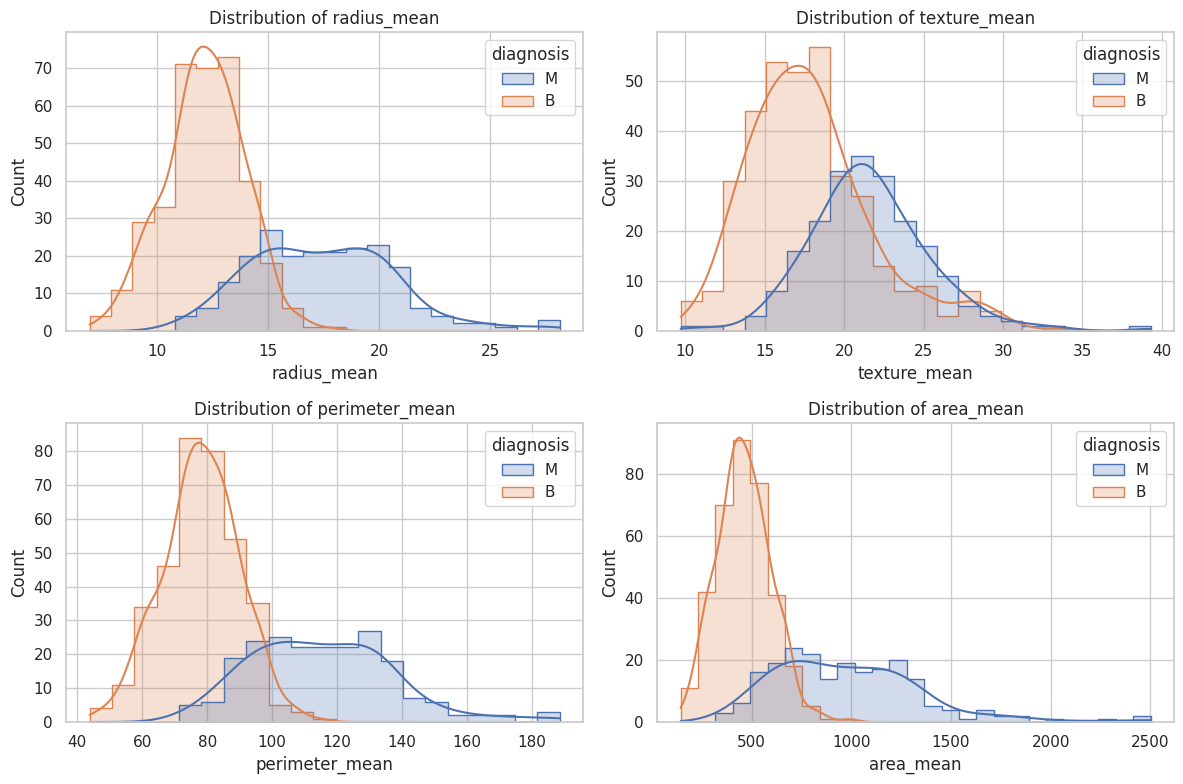

In [ ]:
# 3.2 Distribution of a few important features
sample_feats = ['radius_mean','texture_mean','perimeter_mean','area_mean']
plt.figure(figsize=(12,8))
for i, f in enumerate(sample_feats,1):
    plt.subplot(2,2,i)
    sns.histplot(data=df, x=f, hue='diagnosis', kde=True, element='step')
    plt.title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

# 5) Prepare data: features, split, scaling

In [ ]:
md('## 🧭 4) Prepare data: split (stratified) + scaling')

FEATURES = [c for c in df.columns if c not in ['diagnosis','target']]
X = #INSERT_YOUR_CODE
y = #INSERT_YOUR_CODE

# stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=YOUR_TARGET, random_state=RANDOM_STATE
)

md(f'**Train shape:** `{X_train.shape}` — **Test shape:** `{X_test.shape}`')

# We'll use a pipeline later; but create and fit a scaler to show save/load
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# save scaler for deployment example
joblib.dump(scaler, 'scaler.joblib')
md('Saved `scaler.joblib`')

## 🧭 4) Prepare data: split (stratified) + scaling

**Train shape:** `(455, 30)` — **Test shape:** `(114, 30)`

Saved `scaler.joblib`

# 6) Train models: Decision Tree, RandomForest, Logistic Regression, MLP

In [ ]:
md('## ⚙️ 5) Train models (Decision Tree, Random Forest, Logistic Regression, MLP)')

models = {
    'DecisionTree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'LogisticRegression': LogisticRegression(max_iter=2000, solver='lbfgs', random_state=RANDOM_STATE),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=RANDOM_STATE)
}

## ⚙️ 5) Train models (Decision Tree, Random Forest, Logistic Regression, MLP)

In [ ]:
results = []
trained_models = {}

In [ ]:
for name, model in models.items():
    md(f'### ▶️ Training: **{name}**')
    # For convenience use scaled inputs for all models (works well)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = (model.predict_proba(X_test_scaled)[:,1]
               if hasattr(model, 'predict_proba') else None)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append({
        'model': name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'roc_auc': roc
    })
    trained_models[name] = model
    md(f'**{name}** — accuracy: `{acc:.4f}`, precision: `{prec:.4f}`, recall: `{rec:.4f}`, f1: `{f1:.4f}`, roc_auc: `{roc:.4f}`')

    if "DecisionTree" in name:
        joblib.dump(model, "decision_tree_model.joblib")
        md("✅ Saved Decision Tree model as `decision_tree_model.joblib` for SHAP explanation later.")

### ▶️ Training: **DecisionTree**

**DecisionTree** — accuracy: `0.9298`, precision: `0.9048`, recall: `0.9048`, f1: `0.9048`, roc_auc: `0.9246`

✅ Saved Decision Tree model as `decision_tree_model.joblib` for SHAP explanation later.

### ▶️ Training: **RandomForest**

**RandomForest** — accuracy: `0.9737`, precision: `1.0000`, recall: `0.9286`, f1: `0.9630`, roc_auc: `0.9929`

### ▶️ Training: **LogisticRegression**

**LogisticRegression** — accuracy: `0.9649`, precision: `0.9750`, recall: `0.9286`, f1: `0.9512`, roc_auc: `0.9960`

### ▶️ Training: **MLP**

**MLP** — accuracy: `0.9649`, precision: `1.0000`, recall: `0.9048`, f1: `0.9500`, roc_auc: `0.9937`

In [ ]:
results_df = pd.DataFrame(results).sort_values('roc_auc', ascending=False).reset_index(drop=True)
md('### 📈 Model comparison (table)')
display(results_df)

### 📈 Model comparison (table)

,model,accuracy,precision,recall,f1,roc_auc
0,LogisticRegression,0.964912,0.975000,0.928571,0.951220,0.996032
1,MLP,0.964912,1.000000,0.904762,0.950000,0.993717
2,RandomForest,0.973684,1.000000,0.928571,0.962963,0.992890
3,DecisionTree,0.929825,0.904762,0.904762,0.904762,0.924603


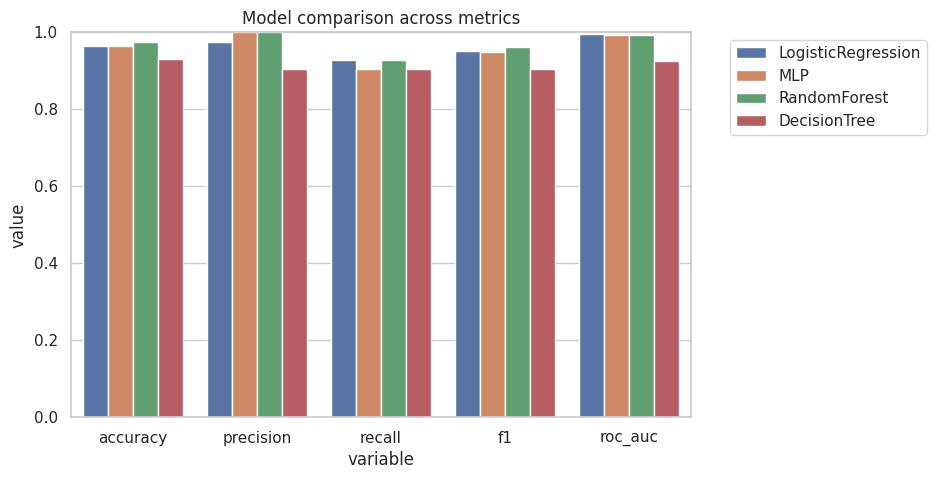

In [ ]:
# Visual comparison
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.melt(id_vars='model', value_vars=['accuracy','precision','recall','f1','roc_auc']),
            x='variable', y='value', hue='model')
plt.title('Model comparison across metrics')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# 7) Save best model + pipeline (deployment example)

In [ ]:
md('## 💾 6) Save best model as a pipeline (scaler + model) for deployment')

# pick winner by roc_auc
winner_name = results_df.loc[0, 'model']
winner_model = trained_models[winner_name]
md(f'**Winner by ROC AUC:** `{winner_name}` 🏆')

# create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', type(winner_model)())
])
# for pipeline cloning, use same params as winner
pipeline.set_params(**{'clf': winner_model})
# Actually the above sets clf to estimator instance which is already fitted; for saving we can save scaler + model separately

# Save both scaler (fitted) and model
joblib.dump({'scaler': scaler, 'model': winner_model}, 'best_model_and_scaler.joblib')
md('Saved `best_model_and_scaler.joblib` containing scaler and model.')

## 💾 6) Save best model as a pipeline (scaler + model) for deployment

**Winner by ROC AUC:** `LogisticRegression` 🏆

Saved `best_model_and_scaler.joblib` containing scaler and model.

In [ ]:
# Example: load and predict on new sample
loaded = joblib.load('best_model_and_scaler.joblib')
loaded_scaler = loaded['scaler']
loaded_model = loaded['model']

# pick a sample from test set
sample_idx = 0
sample_X = X_test.iloc[sample_idx:sample_idx+1]
sample_X_scaled = loaded_scaler.transform(sample_X)
print('Loaded model prediction (prob malignant):', loaded_model.predict_proba(sample_X_scaled)[0,1])

Loaded model prediction (prob malignant): 0.0003645681159627862


# 8) Model introspection: Logistic weights & Tree feature importances

## 🔬 7) Introspection: what the models say about features

**Top features by absolute logistic coefficient:**

,0
texture_worst,1.434093
radius_se,1.233325
symmetry_worst,1.061264
concave points_mean,0.952813
concavity_worst,0.911406
area_se,0.909029
compactness_se,0.906925
area_worst,0.900477
radius_worst,0.896968
concavity_mean,0.782298


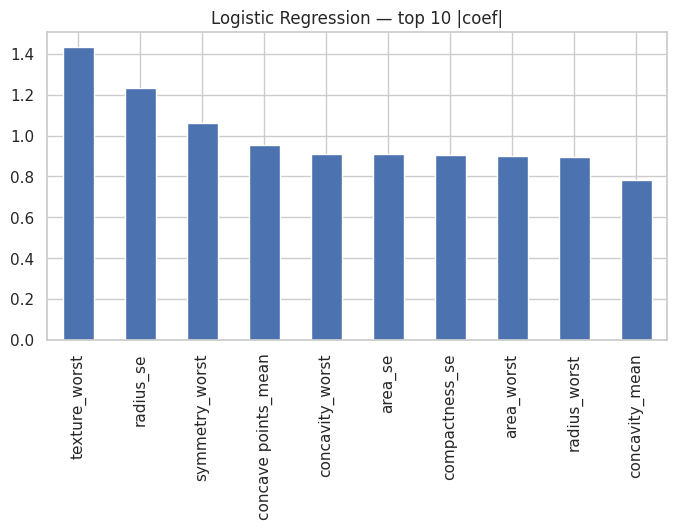

In [ ]:
md('## 🔬 7) Introspection: what the models say about features')

# Logistic regression coefficients (if present)
if 'LogisticRegression' in trained_models:
    lr = trained_models['LogisticRegression']
    coefs = pd.Series(lr.coef_[0], index=FEATURES).abs().sort_values(ascending=False)
    md('**Top features by absolute logistic coefficient:**')
    display(coefs.head(10))
    plt.figure(figsize=(8,4))
    coefs.head(10).plot(kind='bar')
    plt.title('Logistic Regression — top 10 |coef|')
    plt.show()

**Random Forest — feature importances (top 10):**

,0
area_worst,0.151412
concave points_worst,0.126497
radius_worst,0.093475
perimeter_worst,0.083642
concave points_mean,0.081082
perimeter_mean,0.077126
radius_mean,0.061990
concavity_mean,0.050818
area_mean,0.045916
concavity_worst,0.030022


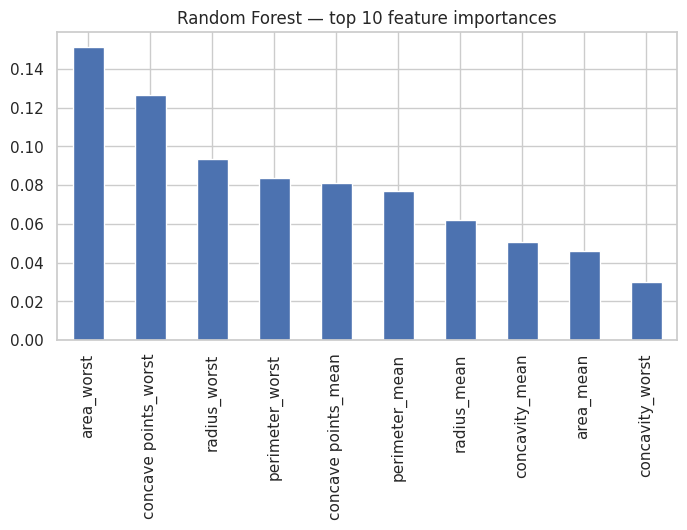

In [ ]:
# Random forest feature importances (if present)
if 'RandomForest' in trained_models:
    rf = trained_models['RandomForest']
    importances = pd.Series(rf.feature_importances_, index=FEATURES).sort_values(ascending=False)
    md('**Random Forest — feature importances (top 10):**')
    display(importances.head(10))
    plt.figure(figsize=(8,4))
    importances.head(10).plot(kind='bar')
    plt.title('Random Forest — top 10 feature importances')
    plt.show()

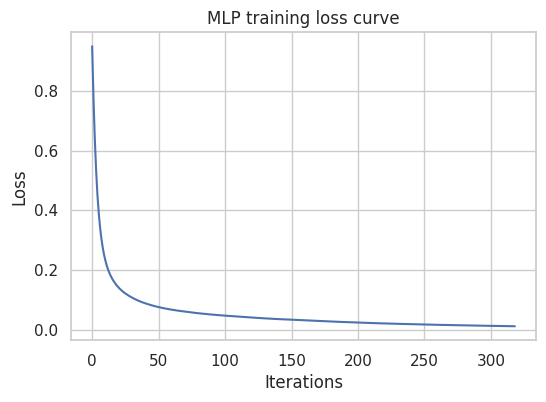

In [ ]:
# MLP loss curve
if 'MLP' in trained_models:
    mlp = trained_models['MLP']
    if hasattr(mlp, 'loss_curve_'):
        plt.figure(figsize=(6,4))
        plt.plot(mlp.loss_curve_)
        plt.title('MLP training loss curve')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()

# 9) Explain winner with LIME

In [ ]:
md('## 🧾 8) Explaining the winner with **LIME** — local explanations')
md('LIME explains individual predictions: it perturbs the instance and fits a local interpretable model. \nPositive weights increase the probability of the predicted class; negative decrease it. ✅')

from lime.lime_tabular import LimeTabularExplainer

# We'll explain a test instance
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=FEATURES,
    class_names=['Benign', 'Malignant'],
    mode='classification',
    random_state=RANDOM_STATE
)

## 🧾 8) Explaining the winner with **LIME** — local explanations

LIME explains individual predictions: it perturbs the instance and fits a local interpretable model. 
Positive weights increase the probability of the predicted class; negative decrease it. ✅

In [ ]:
idx = 5  # change to any test index
test_instance = X_test.iloc[idx].values

md(f'Explaining test instance index `{X_test.index[idx]}` (local index {idx}) with LIME')
exp = explainer.explain_instance(test_instance, loaded_model.predict_proba, num_features=10)

Explaining test instance index `318` (local index 5) with LIME

In [ ]:
# Show textual explanation
md('**LIME explanation (feature contributions)**')
for feat, weight in exp.as_list():
    print(f'{feat:40s} -> {weight:.4f}')

**LIME explanation (feature contributions)**

radius_mean <= 11.71                     -> 0.0000
16.34 < texture_mean <= 18.90            -> 0.0000
perimeter_mean <= 75.23                  -> 0.0000
area_mean <= 420.40                      -> 0.0000
0.10 < smoothness_mean <= 0.10           -> 0.0000
compactness_mean > 0.13                  -> 0.0000
concavity_mean > 0.13                    -> 0.0000
0.03 < concave points_mean <= 0.07       -> 0.0000
symmetry_mean > 0.20                     -> 0.0000
fractal_dimension_mean > 0.07            -> 0.0000


In [ ]:
# Save HTML view to file and display inline (works in Colab)
html = exp.as_html()
open('lime_explanation.html', 'w').write(html)
md('Saved LIME explanation as `lime_explanation.html` — you can open it or display below:')
display(HTML(html))

md('**How to read LIME:**\n- Each row is a feature (possibly discretized).\n- Positive weight: pushes prediction towards the explained class (Malignant).\n- Negative weight: pushes away from that class (towards Benign).\n- Magnitude = strength of local influence. 🔎')

Saved LIME explanation as `lime_explanation.html` — you can open it or display below:

**How to read LIME:**
- Each row is a feature (possibly discretized).
- Positive weight: pushes prediction towards the explained class (Malignant).
- Negative weight: pushes away from that class (towards Benign).
- Magnitude = strength of local influence. 🔎

# 10) Explain winner with SHAP

In [ ]:
md('## 🔍 9) Explaining the winner with **SHAP** — global + local explanations')
md('SHAP uses game-theoretic values to distribute importance across features. It gives both global (summary) and local (force/waterfall) views.')

import shap

## 🔍 9) Explaining the winner with **SHAP** — global + local explanations

SHAP uses game-theoretic values to distribute importance across features. It gives both global (summary) and local (force/waterfall) views.

In [ ]:
md("## 🔍 SHAP Explainability for Decision Tree")

import shap
import joblib
import pandas as pd
import numpy as np

# ✅ 1. Load the saved Decision Tree model
dtree_model = joblib.load("decision_tree_model.joblib")

# ✅ 2. Load the scaler (used during training)
scaler = joblib.load("scaler.joblib")

## 🔍 SHAP Explainability for Decision Tree

In [ ]:
# ✅ 3. Prepare X_test_scaled as a DataFrame with column names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=FEATURES)

In [ ]:
# ✅ 4. Create a SHAP TreeExplainer
explainer = shap.TreeExplainer(dtree_model)
shap_values_all = explainer.shap_values(X_test_scaled_df)

# ✅ Check if the output is a list (binary classification)
if isinstance(shap_values_all, list):
    shap_values = shap_values_all[1]   # class 1 (malignant)
else:
    shap_values = shap_values_all      # no need to index

print("✅ shap_values:", shap_values.shape)
print("✅ X_test:", X_test_scaled_df.shape)

✅ shap_values: (114, 30, 2)
✅ X_test: (114, 30)


### 🌍 Global Explanation — Which features most influence the decision

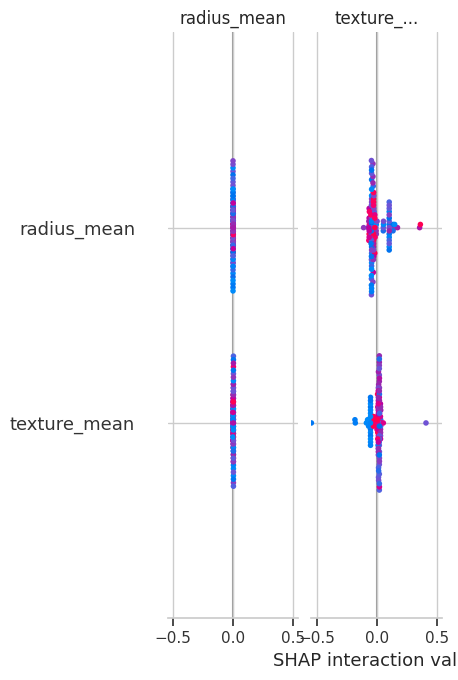

In [ ]:
# ✅ 5. Plot summary
md("### 🌍 Global Explanation — Which features most influence the decision")
shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    feature_names=FEATURES
)

In [ ]:
md('**How to read SHAP results:**\n- Summary plot: features sorted by importance; color shows feature value (high/low).\n- Force plot: shows how each feature pushes the prediction from the base value to the model output for that instance.\n- Positive SHAP value (for class=Malignant) pushes towards Malignant, negative pulls towards Benign. 🧭')

**How to read SHAP results:**
- Summary plot: features sorted by importance; color shows feature value (high/low).
- Force plot: shows how each feature pushes the prediction from the base value to the model output for that instance.
- Positive SHAP value (for class=Malignant) pushes towards Malignant, negative pulls towards Benign. 🧭

# 11) Final summary for the students

In [ ]:
md('## ✅ Final summary (copy into your lecture notes)')
md('''
- We loaded the dataset from GitHub and performed EDA (class balance, distributions, correlations). 📊
- We split data **stratified** to preserve class proportion in train/test. 🎯
- Trained 4 models: Decision Tree, Random Forest, Logistic Regression, MLP. ✔️
- Compared models using accuracy/precision/recall/f1/ROC AUC and selected a winner automatically by ROC AUC. 🏆
- Saved the scaler + best model for deployment using `joblib`.
- Interpreted model internals: logistic coefficients and tree feature importances. 🔬
- Used **LIME** to explain single predictions locally — useful for teaching how features influence one prediction. 🧾
- Used **SHAP** to produce both global (summary) and local (force/waterfall) explanations — useful to see which features consistently matter. 🔍''')

## ✅ Final summary (copy into your lecture notes)


- We loaded the dataset from GitHub and performed EDA (class balance, distributions, correlations). 📊
- We split data **stratified** to preserve class proportion in train/test. 🎯
- Trained 4 models: Decision Tree, Random Forest, Logistic Regression, MLP. ✔️
- Compared models using accuracy/precision/recall/f1/ROC AUC and selected a winner automatically by ROC AUC. 🏆
- Saved the scaler + best model for deployment using `joblib`.
- Interpreted model internals: logistic coefficients and tree feature importances. 🔬
- Used **LIME** to explain single predictions locally — useful for teaching how features influence one prediction. 🧾
- Used **SHAP** to produce both global (summary) and local (force/waterfall) explanations — useful to see which features consistently matter. 🔍